In [1]:
%run flood_helpers.ipynb
# .ipynb file with import packages and def functions to help clean up main notebook

# Load Data
### Source: 
FEMA's National Flood Insurance Policy Database [Kaggle](https://www.kaggle.com/datasets/lynma01/femas-national-flood-insurance-policy-database) <br/>
US Census Demographic Data [Kaggle](https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data)

In [2]:
flood_policies = load_data("nfip-flood-policies.csv")
flood_policies.shape

(50406944, 45)

In [3]:
flood_policies.head(10)

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,federalpolicyfee,floodzone,hfiaasurcharge,houseofworshipindicator,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,nonprofitindicator,numberoffloorsininsuredbuilding,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,policycost,policycount,policyeffectivedate,policyterminationdate,policytermindicator,postfirmconstructionindicator,primaryresidenceindicator,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,NaN,NaN,2.0,NaN,3.301304e+10,N,N,33013.0,0.00,0,0,N,NaN,999.0,13.0,X,0.0,NaN,43.3,Basement/Enclosure/Crawlspace/Subgrade Crawlsp...,-71.8,NaN,NaN,NaN,2.0,NaN,1.0,1974-12-30,2008-08-19,388.0,1.0,2009-08-19,2010-08-19,1.0,N,Y,NH,03278,7,R,WARNER,NaN,250000.0,100000.0,375.0
1,NaN,NaN,0.0,NaN,2.206304e+10,N,N,22063.0,0.05,1,1,N,NaN,999.0,35.0,AE,0.0,NaN,30.5,Lowest floor only above ground level (No basem...,-91.0,NaN,NaN,NaN,1.0,NaN,3.0,1974-07-01,1997-10-04,315.0,1.0,2009-10-04,2010-10-04,1.0,N,Y,LA,70726,1,R,DENHAM SPRINGS,NaN,16400.0,8800.0,280.0
2,NaN,NaN,0.0,NaN,4.505106e+10,N,N,45051.0,0.00,0,0,N,1,999.0,13.0,X,0.0,NaN,33.7,Lowest floor only above ground level (No basem...,-79.0,NaN,NaN,NaN,1.0,NaN,1.0,2003-07-01,2005-08-13,348.0,1.0,2009-08-13,2010-08-13,1.0,Y,Y,SC,29579,7,R,MYRTLE BEACH,NaN,250000.0,100000.0,335.0
3,NaN,519.0,2.0,2016-04-01,1.055001e+09,N,N,1055.0,0.00,1,1,Y,NaN,-2.0,35.0,AE,0.0,NaN,34.0,NaN,-86.0,517.3,517.3,NaN,3.0,50,1.0,1989-01-01,2006-04-14,951.0,1.0,2009-04-14,2010-04-14,1.0,Y,Y,AL,35901,2,R,GADSDEN,NaN,174900.0,21000.0,916.0
4,NaN,7.0,0.0,NaN,1.208600e+10,N,N,12086.0,0.00,0,0,N,3,0.0,35.0,A10,0.0,NaN,26.0,Lowest floor only above ground level (No basem...,-80.1,NaN,6.9,NaN,1.0,NaN,1.0,1957-07-01,1996-04-04,1323.0,1.0,2009-04-04,2010-04-04,1.0,N,Y,FL,33160,1,R,GOLDEN BEACH,NaN,250000.0,100000.0,1288.0
5,NaN,13.0,0.0,NaN,4.501900e+10,N,N,45019.0,0.25,1,1,Y,NaN,1.0,35.0,A02,0.0,NaN,32.8,Lowest floor only above ground level (No basem...,-80.0,10.8,13.5,NaN,1.0,10,1.0,1966-01-01,2006-07-20,524.0,1.0,2009-07-20,2010-07-20,1.0,N,Y,SC,29407,1,R,CHARLESTON,NaN,250000.0,55100.0,489.0
6,NaN,NaN,0.0,NaN,3.402974e+10,N,N,34029.0,0.15,2,2,N,1,999.0,35.0,A06,0.0,NaN,39.7,Lowest floor above ground level and higher flo...,-74.2,NaN,NaN,NaN,2.0,NaN,1.0,1972-01-01,1998-12-29,1407.0,1.0,2009-12-29,2010-12-29,1.0,N,N,NJ,08008,1,R,SHIP BOTTOM,NaN,250000.0,1600.0,1372.0
7,NaN,NaN,0.0,NaN,4.820134e+10,N,N,48201.0,0.00,1,1,N,NaN,999.0,13.0,X,0.0,NaN,29.6,Lowest floor only above ground level (No basem...,-95.1,NaN,NaN,NaN,2.0,NaN,1.0,1988-07-15,2009-11-23,348.0,1.0,2009-11-23,2010-11-23,1.0,Y,Y,TX,77062,7,R,HOUSTON,NaN,250000.0,100000.0,335.0
8,NaN,NaN,1.0,2015-04-21,3.301708e+10,N,N,33017.0,0.00,1,1,N,1,999.0,35.0,X,0.0,NaN,43.1,Basement/Enclosure/Crawlspace/Subgrade Crawlsp...,-70.9,NaN,NaN,NaN,2.0,NaN,1.0,1968-01-01,2007-08-10,1438.0,1.0,2009-08-10,2010-08-10,1.0,N,Y,NH,03824,1,R,DURHAM,NaN,250000.0,52500.0,1403.0
9,NaN,NaN,0.0,NaN,1.205701e+10,U,N,12057.0,0.10,0,0,N,NaN,999.0,35.0,X,0.0,NaN,28.0,Lowest floor only above ground level (No basem...,-82.6,NaN,NaN,NaN,1.0,NaN,3.0,1998-06-01,2007-09-13,454.0,1.0,2009-09-13,2010-09-13,1.0,Y,Y,FL,33607,1,R,TAMPA,NaN,43300.0,10700.0,419.0


In [4]:
policies_df = rename_flood_columns(flood_policies)
for col in policies_df.columns:
    print(col)

agriculture_structure_indicator
base_flood_elevation
basement_enclosure_crawlspace_type
cancellation_date_of_flood_policy
census_tract
condominium_indicator
construction
county_code
crs_discount
deductible_amount_in_building_coverage
deductible_amount_in_contents_coverage
elevated_building_indicator
elevation_certificate_indicator
elevation_difference
federal_policy_fee
flood_zone
hfiaa_surcharge
house_of_worship_indicator
latitude
location_of_contents
longitude
lowest_adjacent_grade
lowest_floor_elevation
non_profit_indicator
number_of_floors_in_insured_building
obstruction_type
occupancy_type
original_construction_date
original_nb_date
policy_cost
policy_count
policy_effective_date
policy_termination_date
policy_term_indicator
post_firm_construction_indicator
primary_residence_indicator
property_state
reported_zipcode
rate_method
regular_emergency_program_indicator
reported_city
small_business_indicator_building
total_building_insurance_coverage
total_contents_insurance_coverage
tota

In [5]:
total_coverage = policies_df['total_building_insurance_coverage']+ policies_df['total_contents_insurance_coverage']
premium = policies_df['total_insurance_premium_of_the_policy']
policies_df['premium_rate'] = np.where(total_coverage == 0,
                                            np.nan,
                                            premium / total_coverage)

In [6]:
census_df = load_data("acs2015_census_tract_data.csv")

In [7]:
census_df.shape

(74001, 37)

In [8]:
census_df.head(10)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,61838.0,11900.0,25713.0,4548.0,8.1,8.4,34.7,17.0,21.3,11.9,15.2,90.2,4.8,0.0,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,32303.0,13538.0,18021.0,2474.0,25.5,40.3,22.3,24.7,21.5,9.4,22.0,86.3,13.1,0.0,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,44922.0,5629.0,20689.0,2817.0,12.7,19.7,31.4,24.9,22.1,9.2,12.4,94.8,2.8,0.0,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,54329.0,7003.0,24125.0,2870.0,2.1,1.6,27.0,20.8,27.0,8.7,16.4,86.6,9.1,0.0,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,51965.0,6935.0,27526.0,2813.0,11.4,17.5,49.6,14.2,18.2,2.1,15.8,88.0,10.5,0.0,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2
5,1001020600,Alabama,Autauga,3851,1787,2064,13.1,72.9,11.9,0.0,0.0,0.0,2642,63092.0,9585.0,30480.0,7550.0,14.4,21.9,24.2,17.5,35.4,7.9,14.9,82.7,6.9,0.0,0.0,6.0,4.5,19.8,1560,79.4,14.7,5.8,0.0,10.9
6,1001020700,Alabama,Autauga,2761,1210,1551,3.8,74.5,19.7,0.0,0.0,0.0,2060,34821.0,7867.0,20442.0,3245.0,28.9,41.9,19.5,29.6,25.3,10.1,15.5,92.4,7.6,0.0,0.0,0.0,0.0,20.0,1166,82.0,14.6,3.4,0.0,11.4
7,1001020801,Alabama,Autauga,3187,1502,1685,1.3,84.0,10.7,3.1,0.0,0.0,2391,73728.0,2447.0,32813.0,4669.0,13.0,25.9,42.8,10.7,34.2,5.5,6.8,84.3,8.1,0.0,0.0,1.7,5.9,24.3,1502,78.1,14.8,7.1,0.0,8.2
8,1001020802,Alabama,Autauga,10915,5486,5429,1.4,89.5,8.4,0.0,0.0,0.0,7778,60063.0,8602.0,24028.0,2233.0,13.9,18.3,31.5,17.5,26.1,7.8,17.1,90.1,8.6,0.0,0.0,0.0,1.3,29.4,4348,73.3,22.1,4.6,0.0,8.7
9,1001020900,Alabama,Autauga,5668,2897,2771,0.4,85.5,12.1,0.0,0.3,0.0,4217,41287.0,7857.0,24710.0,4149.0,6.8,10.0,29.3,13.7,17.7,11.0,28.3,88.7,7.9,0.0,0.0,1.2,2.1,32.9,2485,77.9,15.2,6.9,0.0,7.2


In [9]:
census_df = census_df.rename(columns=pascal_to_snake)
for col in census_df.columns:
    print(col)

census_tract
state
county
total_pop
men
women
hispanic
white
black
native
asian
pacific
citizen
income
income_err
income_per_cap
income_per_cap_err
poverty
child_poverty
professional
service
office
construction
production
drive
carpool
transit
walk
other_transp
work_at_home
mean_commute
employed
private_work
public_work
self_employed
family_work
unemployment


In [10]:
census_subset = census_df[["census_tract", "total_pop", "income", "income_per_cap", "poverty"]]
census_subset.head()

,census_tract,total_pop,income,income_per_cap,poverty
0,1001020100,1948,61838.0,25713.0,8.1
1,1001020200,2156,32303.0,18021.0,25.5
2,1001020300,2968,44922.0,20689.0,12.7
3,1001020400,4423,54329.0,24125.0,2.1
4,1001020500,10763,51965.0,27526.0,11.4


In [11]:
census_subset.isna().sum()

census_tract         0
total_pop            0
income            1100
income_per_cap     740
poverty            835
dtype: int64

In [12]:
census_cleaned = census_subset.fillna("Missing")


In [13]:
census_cleaned.describe()

,census_tract,total_pop
count,7.400100e+04,74001.000000
mean,2.839113e+10,4325.591465
std,1.647593e+10,2129.306903
min,1.001020e+09,0.000000
25%,1.303901e+10,2891.000000
50%,2.804700e+10,4063.000000
75%,4.200341e+10,5442.000000
max,7.215375e+10,53812.000000


In [14]:
policies_df.isna().sum()

agriculture_structure_indicator           38923313
base_flood_elevation                      33636760
basement_enclosure_crawlspace_type             803
cancellation_date_of_flood_policy         43614058
census_tract                                467120
condominium_indicator                            7
construction                                    14
county_code                                  49000
crs_discount                                     1
deductible_amount_in_building_coverage      661994
deductible_amount_in_contents_coverage     5561585
elevated_building_indicator                    259
elevation_certificate_indicator           32606398
elevation_difference                             1
federal_policy_fee                               1
flood_zone                                  169146
hfiaa_surcharge                                  1
house_of_worship_indicator                34476252
latitude                                    338700
location_of_contents           

In [15]:
policies_df.duplicated().sum()

np.int64(929737)

In [16]:
policies_cleaned = policies_df.drop_duplicates().copy()

In [17]:
df_subset = flood_subset(policies_cleaned).copy()

In [18]:
col_to_fill = ['small_business_indicator_building', 'obstruction_type', 
                  'non_profit_indicator', 'house_of_worship_indicator', 'agriculture_structure_indicator',
                  'cancellation_date_of_flood_policy']

In [19]:
df_subset[col_to_fill] = df_subset[col_to_fill].fillna("Unknown")

In [20]:
df_subset.isna().sum()

flood_zone                                74982
latitude                                 330117
longitude                                330117
property_state                                1
reported_city                                12
small_business_indicator_building             0
obstruction_type                              0
reported_zipcode                              8
census_tract                             434828
non_profit_indicator                          0
house_of_worship_indicator                    0
agriculture_structure_indicator               0
cancellation_date_of_flood_policy             0
original_nb_date                              1
policy_effective_date                         1
policy_termination_date                       1
total_building_insurance_coverage             1
total_contents_insurance_coverage             1
total_insurance_premium_of_the_policy         1
premium_rate                                 72
dtype: int64

In [21]:
df_subset = df_subset.dropna()

In [22]:
df_subset['cancellation_date_of_flood_policy'] = pd.to_datetime(df_subset['cancellation_date_of_flood_policy'], errors='coerce')
df_subset['original_nb_date'] = pd.to_datetime(df_subset['original_nb_date'])
df_subset['policy_effective_date'] = pd.to_datetime(df_subset['policy_effective_date'])
df_subset['policy_termination_date'] = pd.to_datetime(df_subset['policy_termination_date'])
df_subset.info()

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_28100\3194024586.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_subset['cancellation_date_of_flood_policy'] = pd.to_datetime(df_subset['cancellation_date_of_flood_policy'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 48970763 entries, 0 to 50406942
Data columns (total 20 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   flood_zone                             object        
 1   latitude                               float64       
 2   longitude                              float64       
 3   property_state                         object        
 4   reported_city                          object        
 5   small_business_indicator_building      object        
 6   obstruction_type                       object        
 7   reported_zipcode                       object        
 8   census_tract                           float64       
 9   non_profit_indicator                   object        
 10  house_of_worship_indicator             object        
 11  agriculture_structure_indicator        object        
 12  cancellation_date_of_flood_policy      datetime64[ns]
 13  

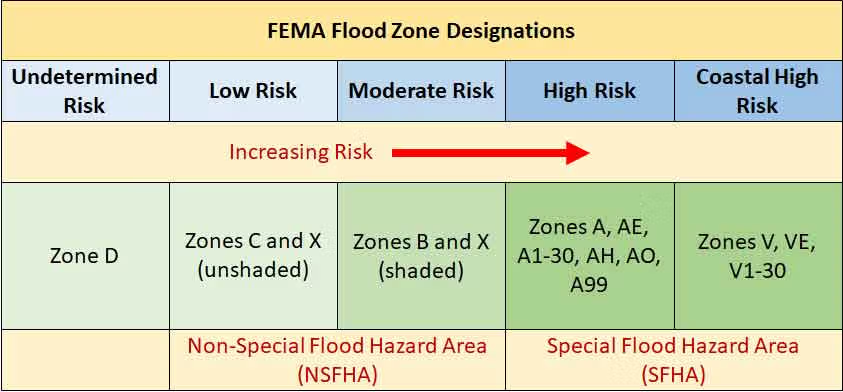

In [23]:
img = Image.open('flood_zones.avif')
display(img)

In [24]:
mask = df_subset['flood_zone'].str.contains('^A')
df_subset['high_flood_zone'] = False
df_subset.loc[mask, 'high_flood_zone'] = True
mask = df_subset['flood_zone'].str.contains('^V')
df_subset['coastal_high_flood_zone'] = False
df_subset.loc[mask, 'coastal_high_flood_zone'] = True
mask = df_subset['flood_zone'].str.contains('^[BCX]')
df_subset['low_moderate_flood_zone'] = False
df_subset.loc[mask, 'low_moderate_flood_zone'] = True
mask = df_subset['flood_zone'].str.contains('^D')
df_subset['undetermined_flood_zone'] = False
df_subset.loc[mask, 'undetermined_flood_zone'] = True
df_subset.head()

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone
0,X,43.3,-71.8,NH,WARNER,Unknown,Unknown,03278,3.301304e+10,Unknown,Unknown,Unknown,NaT,2008-08-19,2009-08-19,2010-08-19,250000.0,100000.0,375.0,0.001071,False,False,True,False
1,AE,30.5,-91.0,LA,DENHAM SPRINGS,Unknown,Unknown,70726,2.206304e+10,Unknown,Unknown,Unknown,NaT,1997-10-04,2009-10-04,2010-10-04,16400.0,8800.0,280.0,0.011111,True,False,False,False
2,X,33.7,-79.0,SC,MYRTLE BEACH,Unknown,Unknown,29579,4.505106e+10,Unknown,Unknown,Unknown,NaT,2005-08-13,2009-08-13,2010-08-13,250000.0,100000.0,335.0,0.000957,False,False,True,False
3,AE,34.0,-86.0,AL,GADSDEN,Unknown,50,35901,1.055001e+09,Unknown,Unknown,Unknown,2016-04-01,2006-04-14,2009-04-14,2010-04-14,174900.0,21000.0,916.0,0.004676,True,False,False,False
4,A10,26.0,-80.1,FL,GOLDEN BEACH,Unknown,Unknown,33160,1.208600e+10,Unknown,Unknown,Unknown,NaT,1996-04-04,2009-04-04,2010-04-04,250000.0,100000.0,1288.0,0.003680,True,False,False,False


In [25]:
df_subset.describe()

,latitude,longitude,census_tract,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate
count,4.897076e+07,4.897076e+07,4.897076e+07,6690746,48970763,48970763,48970763,4.897076e+07,4.897076e+07,4.897076e+07,4.897076e+07
mean,3.261875e+01,-8.786587e+01,2.599405e+10,2015-11-11 15:15:58.090473216,2009-05-03 20:29:42.061479680,2014-03-13 01:43:46.066600960,2015-02-11 11:39:58.053937664,2.371771e+05,5.719579e+04,7.771468e+02,3.748221e-03
min,-1.430000e+01,-1.707000e+02,1.003000e+03,1985-06-19 00:00:00,1984-03-09 00:00:00,2009-01-01 00:00:00,2009-01-02 00:00:00,0.000000e+00,0.000000e+00,-5.928000e+03,-3.660377e-01
25%,2.820000e+01,-9.420000e+01,1.208600e+10,2014-04-04 00:00:00,2006-06-29 00:00:00,2011-07-14 00:00:00,2012-06-18 00:00:00,1.355000e+05,3.000000e+03,3.340000e+02,1.120000e-03
50%,3.030000e+01,-8.260000e+01,2.205702e+10,2016-03-31 00:00:00,2010-07-09 00:00:00,2014-02-05 00:00:00,2014-12-27 00:00:00,2.500000e+05,5.450000e+04,3.900000e+02,1.625000e-03
75%,3.770000e+01,-8.020000e+01,4.200345e+10,2017-08-24 00:00:00,2013-03-22 00:00:00,2016-10-20 00:00:00,2017-09-26 00:00:00,2.500000e+05,1.000000e+05,7.860000e+02,5.128000e-03
max,6.690000e+01,1.458000e+02,7.803096e+10,2045-06-04 00:00:00,2019-12-08 00:00:00,2020-09-16 00:00:00,2020-12-26 00:00:00,2.497500e+08,6.000000e+06,1.061158e+06,2.549500e+01
std,5.732111e+00,1.327884e+01,1.571563e+10,NaN,NaN,NaN,NaN,1.011011e+06,5.919557e+04,1.647318e+03,8.320205e-03


In [26]:
state_count = df_subset['property_state'].value_counts()
state_count

property_state
FL    14637848
TX     7025648
LA     5414839
CA     2681379
NJ     2032934
        ...   
DC       16364
VI        7049
GU        2367
CM          98
AS          64
Name: count, Length: 56, dtype: int64

In [27]:
df_merged = pd.merge(df_subset, census_subset, how = "left", on = "census_tract")

In [28]:
df_merged.shape

(48970763, 28)

In [29]:
df_michigan = df_merged[df_merged['property_state'] == 'MI']
df_michigan.head()

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,total_pop,income,income_per_cap,poverty
416,C,43.1,-86.2,MI,SPRING LAKE,Unknown,Unknown,49456,2.613902e+10,Unknown,Unknown,Unknown,NaT,2007-09-06,2009-09-06,2010-09-06,125000.0,50000.0,294.0,0.001680,False,False,True,False,4769.0,60652.0,34938.0,5.1
628,X,42.3,-83.3,MI,DEARBORN HGTS,Unknown,Unknown,48125,2.616357e+10,Unknown,Unknown,Unknown,NaT,1999-08-18,2009-01-12,2010-01-12,172700.0,0.0,585.0,0.003387,False,False,True,False,4138.0,49836.0,26698.0,11.7
755,C,42.1,-86.4,MI,SAINT JOSEPH,Unknown,10,49085,2.602100e+10,Unknown,Unknown,Unknown,2010-06-16,1997-06-16,2009-06-16,2010-06-16,150000.0,60000.0,283.0,0.001348,False,False,True,False,4772.0,87900.0,33334.0,6.1
1150,AE,42.8,-86.2,MI,MACATAWA,Unknown,Unknown,49434,2.613902e+10,Unknown,Unknown,Unknown,NaT,2007-07-20,2009-07-20,2010-07-20,500000.0,0.0,2500.0,0.005000,True,False,False,False,1156.0,63750.0,36083.0,2.3
1337,AE,42.3,-83.8,MI,ANN ARBOR,Unknown,Unknown,48103,2.616140e+10,Unknown,Unknown,Unknown,NaT,2008-04-08,2009-04-08,2010-04-08,70000.0,0.0,638.0,0.009114,True,False,False,False,3216.0,89722.0,48296.0,6.1


In [30]:
df_flordia = df_merged[df_merged['property_state'] == 'FL']
df_flordia.head()

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,total_pop,income,income_per_cap,poverty
4,A10,26.0,-80.1,FL,GOLDEN BEACH,Unknown,Unknown,33160,1.208600e+10,Unknown,Unknown,Unknown,NaT,1996-04-04,2009-04-04,2010-04-04,250000.0,100000.0,1288.0,0.003680,True,False,False,False,2644.0,72191.0,76930.0,10.7
9,X,28.0,-82.6,FL,TAMPA,Unknown,Unknown,33607,1.205701e+10,Unknown,Unknown,Unknown,NaT,2007-09-13,2009-09-13,2010-09-13,43300.0,10700.0,419.0,0.007759,False,False,True,False,4271.0,80865.0,61747.0,7.9
11,AE,27.8,-80.5,FL,SEBASTIAN,Unknown,Unknown,32958,1.206105e+10,Unknown,Unknown,Unknown,NaT,2009-12-01,2009-12-01,2010-12-01,269000.0,0.0,663.0,0.002465,True,False,False,False,5360.0,46703.0,21674.0,12.8
17,C,27.4,-82.5,FL,UNIVERSITY PK,Unknown,Unknown,34201,1.208100e+10,Unknown,Unknown,Unknown,NaT,2003-05-20,2009-05-20,2010-05-20,150000.0,60000.0,283.0,0.001348,False,False,True,False,5680.0,73470.0,55434.0,3.6
19,X,30.5,-84.2,FL,TALLAHASSEE,Unknown,Unknown,32308,1.207300e+10,Unknown,Unknown,Unknown,NaT,2007-07-06,2009-07-06,2010-07-06,250000.0,100000.0,335.0,0.000957,False,False,True,False,6827.0,80606.0,56678.0,7.9


Text(0.5, 1.0, 'Count of Properties in Each Flood Zone US')

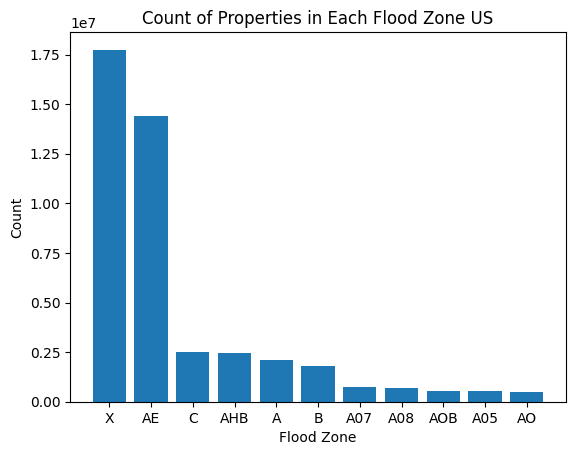

In [31]:
floodzone_counts = df_merged['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone US")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level US')

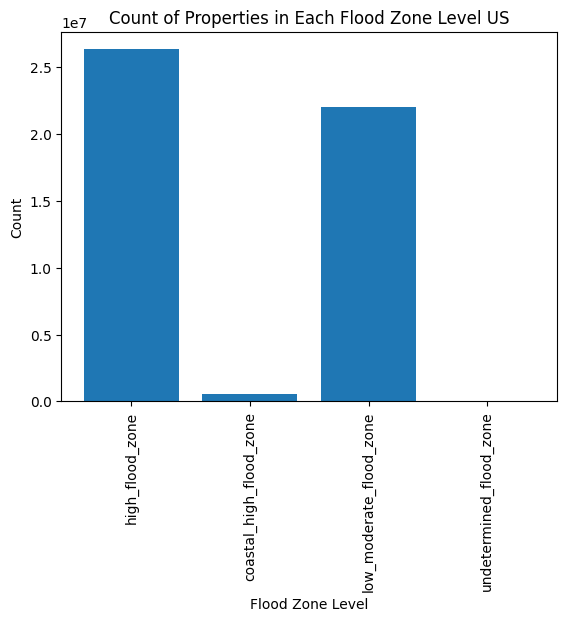

In [32]:
floodzone_counts = df_merged[["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level US")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone MI')

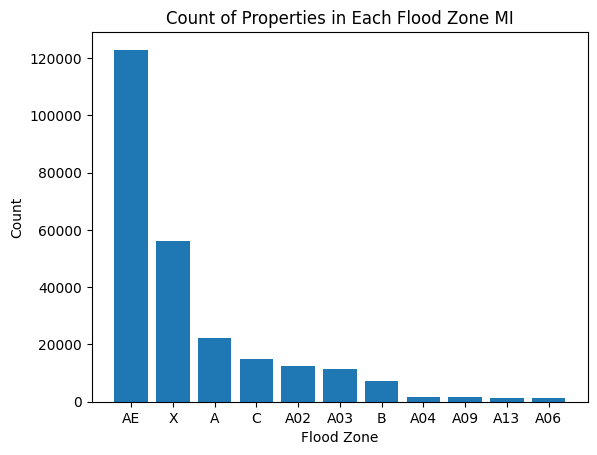

In [33]:
floodzone_counts = df_michigan['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone MI")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level MI')

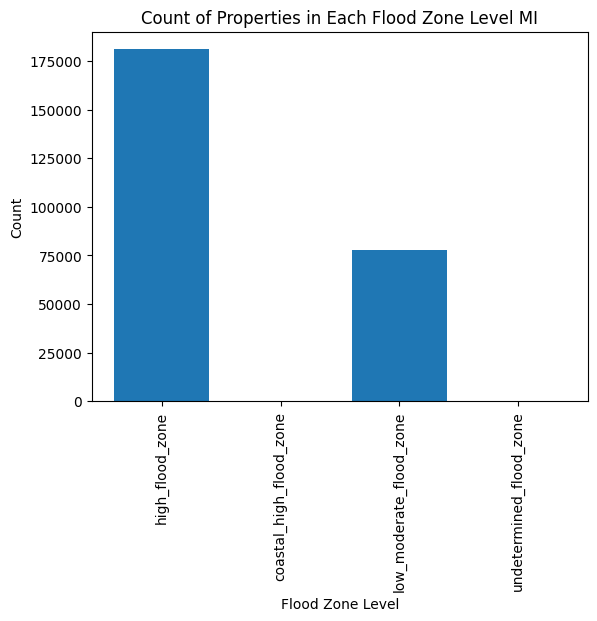

In [34]:
floodzone_counts = df_michigan[["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level MI")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone FL')

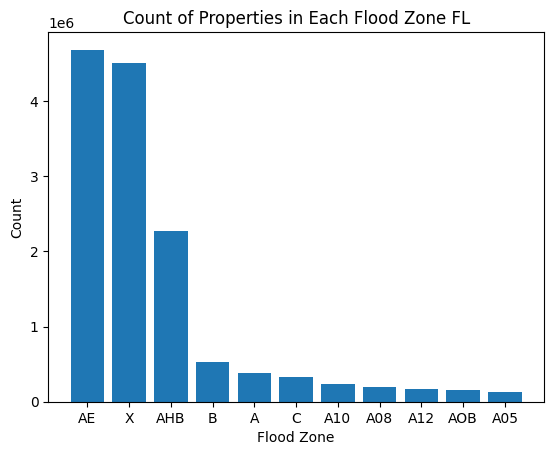

In [35]:
floodzone_counts = df_flordia['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone FL")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level FL')

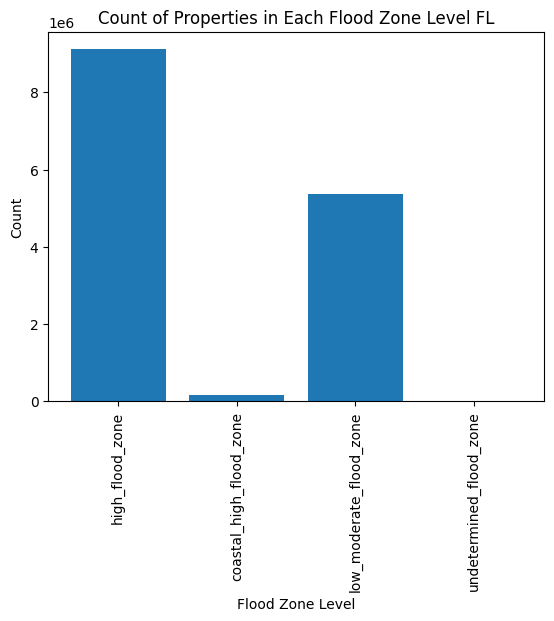

In [36]:
floodzone_counts = df_flordia[["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level FL")

In [37]:
fl_sample = df_flordia.sample(n= 5000, random_state=42)
mi_sample = df_michigan.sample(n = 5000, random_state=42)
df_sample = pd.concat([fl_sample, mi_sample])
df_sample

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,total_pop,income,income_per_cap,poverty
28384293,VE,26.4,-82.0,FL,SANIBEL,Unknown,Unknown,33957,1.207108e+10,Unknown,Unknown,Unknown,NaT,2013-03-07,2014-03-07,2015-03-07,500000.0,396000.0,15086.0,0.016837,False,True,False,False,2538.0,88438.0,69669.0,5.4
15928490,AE,26.6,-81.9,FL,FORT MYERS,Unknown,Unknown,33919,1.207100e+10,Unknown,Unknown,Unknown,2014-08-01,2011-08-19,2012-08-19,2013-08-19,250000.0,85600.0,432.0,0.001287,True,False,False,False,2643.0,66774.0,42261.0,3.2
7405788,AE,25.9,-80.2,FL,MIAMI,Unknown,Unknown,33162,1.208600e+10,Unknown,Unknown,Unknown,NaT,2007-03-29,2010-03-29,2011-03-29,250000.0,0.0,300.0,0.001200,True,False,False,False,6575.0,36861.0,15677.0,20.5
4675649,A11,28.9,-82.6,FL,CRYSTAL RIVER,Unknown,Unknown,34429,1.201745e+10,Unknown,Unknown,Unknown,NaT,2009-10-01,2009-12-12,2010-03-23,75000.0,0.0,554.0,0.007387,True,False,False,False,4023.0,50679.0,35865.0,18.4
37907348,X,26.1,-80.2,FL,FORT LAUDERDALE,N,Unknown,33312,1.201104e+10,N,N,N,NaT,2014-10-29,2017-10-29,2018-10-29,250000.0,100000.0,400.0,0.001143,False,False,True,False,7603.0,47429.0,18527.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28771497,X,42.5,-83.0,MI,WARREN,Unknown,Unknown,48088,2.609926e+10,Unknown,Unknown,Unknown,NaT,2014-10-16,2015-10-16,2016-10-16,200000.0,80000.0,363.0,0.001296,False,False,True,False,3185.0,70838.0,29109.0,4.4
1234631,AE,43.4,-84.1,MI,SAGINAW,Unknown,Unknown,48609,2.614501e+10,Unknown,Unknown,Unknown,NaT,1999-02-24,2009-02-24,2010-02-24,215800.0,0.0,299.0,0.001386,True,False,False,False,1766.0,62202.0,28538.0,4.5
42652691,AE,43.6,-83.7,MI,MUNGER,N,Unknown,48747,2.601729e+10,N,N,N,NaT,2015-07-28,2018-07-28,2019-07-28,100000.0,0.0,1350.0,0.013500,True,False,False,False,5851.0,38386.0,25709.0,14.2
20691643,AE,42.5,-83.3,MI,FARMINGTON HILLS,Unknown,Unknown,48336,2.612517e+10,Unknown,Unknown,Unknown,NaT,2012-05-18,2013-05-18,2014-05-18,175000.0,0.0,1579.0,0.009023,True,False,False,False,5772.0,71667.0,34160.0,4.4


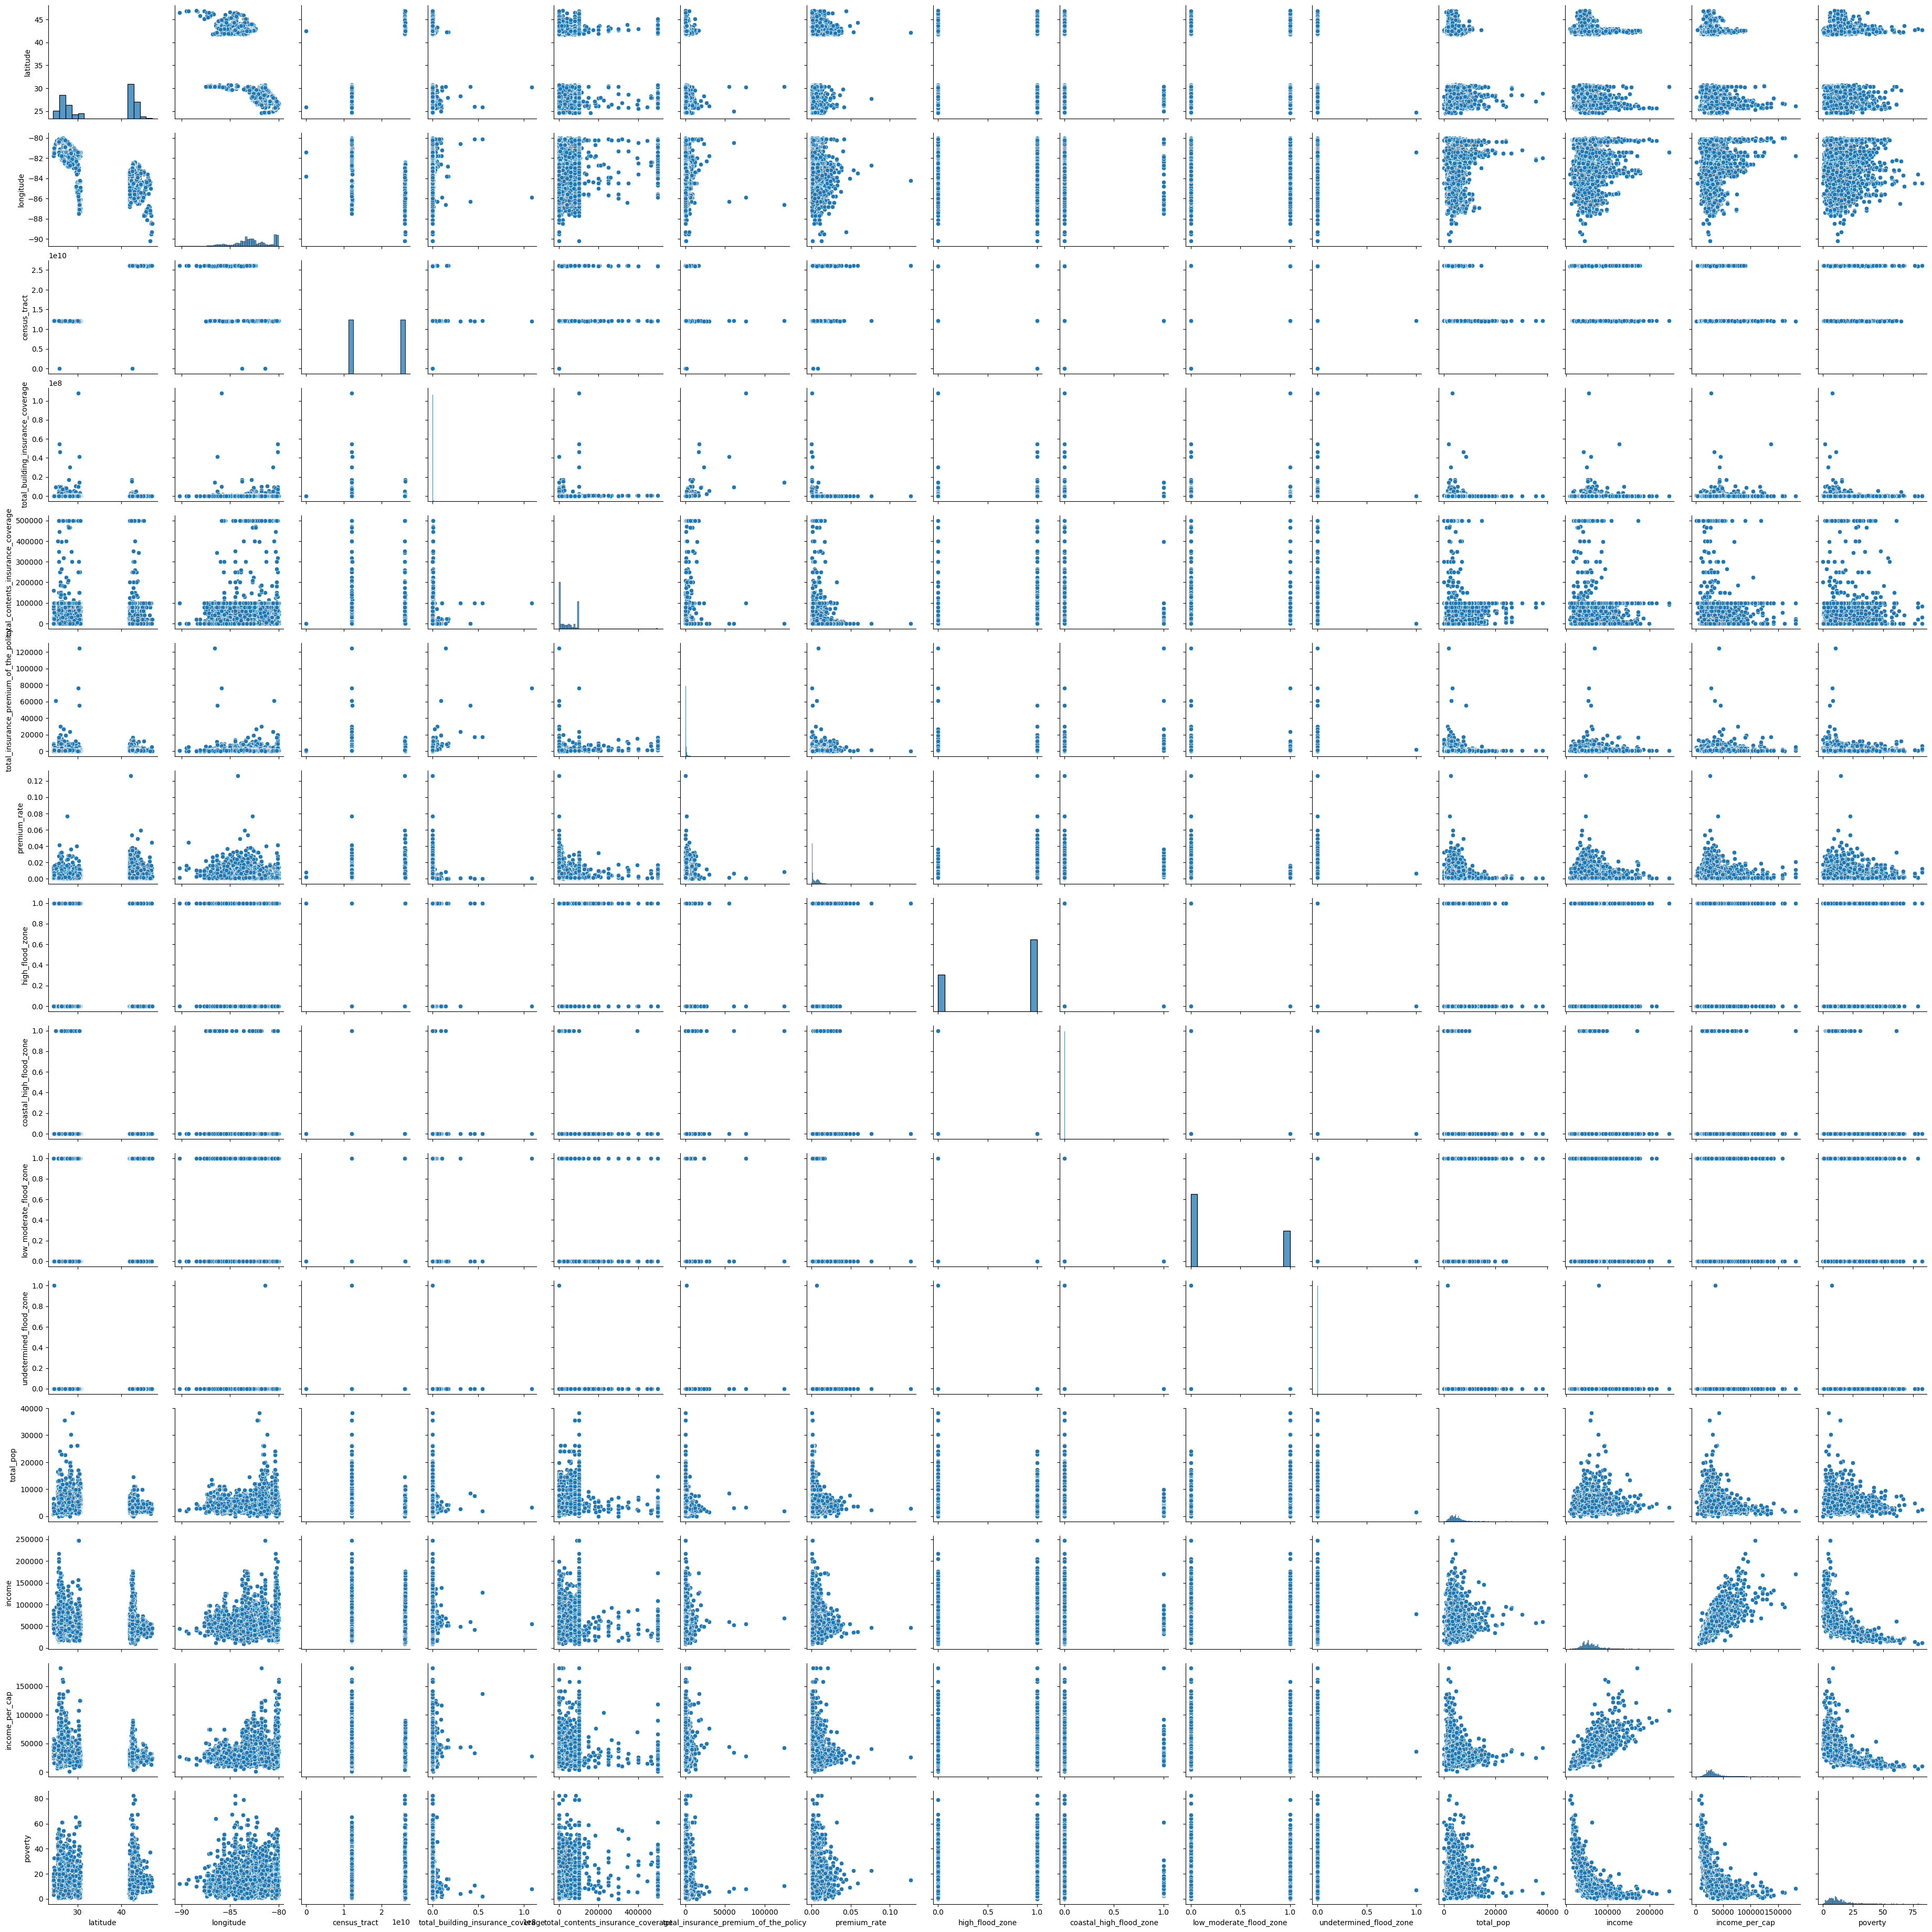

In [38]:
sns.pairplot(df_sample)